# Loading all the dependecies

In [3]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression, SelectKBest
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RepeatedKFold
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from xgboost import XGBRegressor
import shap
import streamlit as st
import os

In [4]:
#Loading the dataset and storing it in a dataframe called df
df = pd.read_csv('cpdata.csv')

In [5]:
#Displaying the first few rows of the dataframe
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Kisumu,Millet,2018,36613,202.935536,121.0,20.879744
1,1,Nakuru,Millet,2018,66667,226.655537,121.0,21.770462
2,2,Kisumu,Millet,2018,23333,263.964248,121.0,23.004459
3,3,Nairobi,Millet,2018,12500,242.864034,121.0,26.491096
4,4,Nairobi,Millet,2018,7000,262.717340,121.0,20.130175


In [6]:
#Displaying the number of rows and columns in the dataset
df.shape

(3100, 8)

In [7]:
#Displyaing the summary of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     3100 non-null   int64  
 1   Area                           3100 non-null   object 
 2   Item                           3100 non-null   object 
 3   Year                           3100 non-null   int64  
 4   hg/ha_yield                    3100 non-null   int64  
 5   average_rain_fall_mm_per_year  3100 non-null   float64
 6   pesticides_tonnes              3100 non-null   float64
 7   avg_temp                       3100 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 193.9+ KB


In [8]:
#Checking if the dataset has any missing values
df.isnull().sum()

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [9]:
#Checking if the dataset has any duplicated rows
df.duplicated().sum()

0

# Transforming average_rain_fall_mm_per_year
  
  In summary, this code identifies the indices of rows in the DataFrame df where the values in the column 'average_rain_fall_mm_per_year' are not numeric strings. These rows can be considered for removal or further processing, depending on the specific use case.

In [10]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True
to_drop = df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [11]:
df = df.drop(to_drop)

In [12]:
df

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Kisumu,Millet,2018,36613,202.935536,121.00,20.879744
1,1,Nakuru,Millet,2018,66667,226.655537,121.00,21.770462
2,2,Kisumu,Millet,2018,23333,263.964248,121.00,23.004459
3,3,Nairobi,Millet,2018,12500,242.864034,121.00,26.491096
4,4,Nairobi,Millet,2018,7000,262.717340,121.00,20.130175
...,...,...,...,...,...,...,...,...
3095,3095,Nakuru,watermelon,2021,22023,58.286977,92967.22,25.287846
3096,3096,Nairobi,watermelon,2021,22023,48.324286,92967.22,26.638386
3097,3097,Eldoret,watermelon,2021,22023,41.532187,92967.22,25.331045
3098,3098,Central,watermelon,2021,22023,43.971937,92967.22,26.897502


In [13]:
#Converting the values of the colomun to floating datatype
df['average_rain_fall_mm_per_year'] = df['average_rain_fall_mm_per_year'].astype(np.float64)

In [14]:
#Checking the number of unique values in the 'Area' column 
len(df['Area'].unique())

5

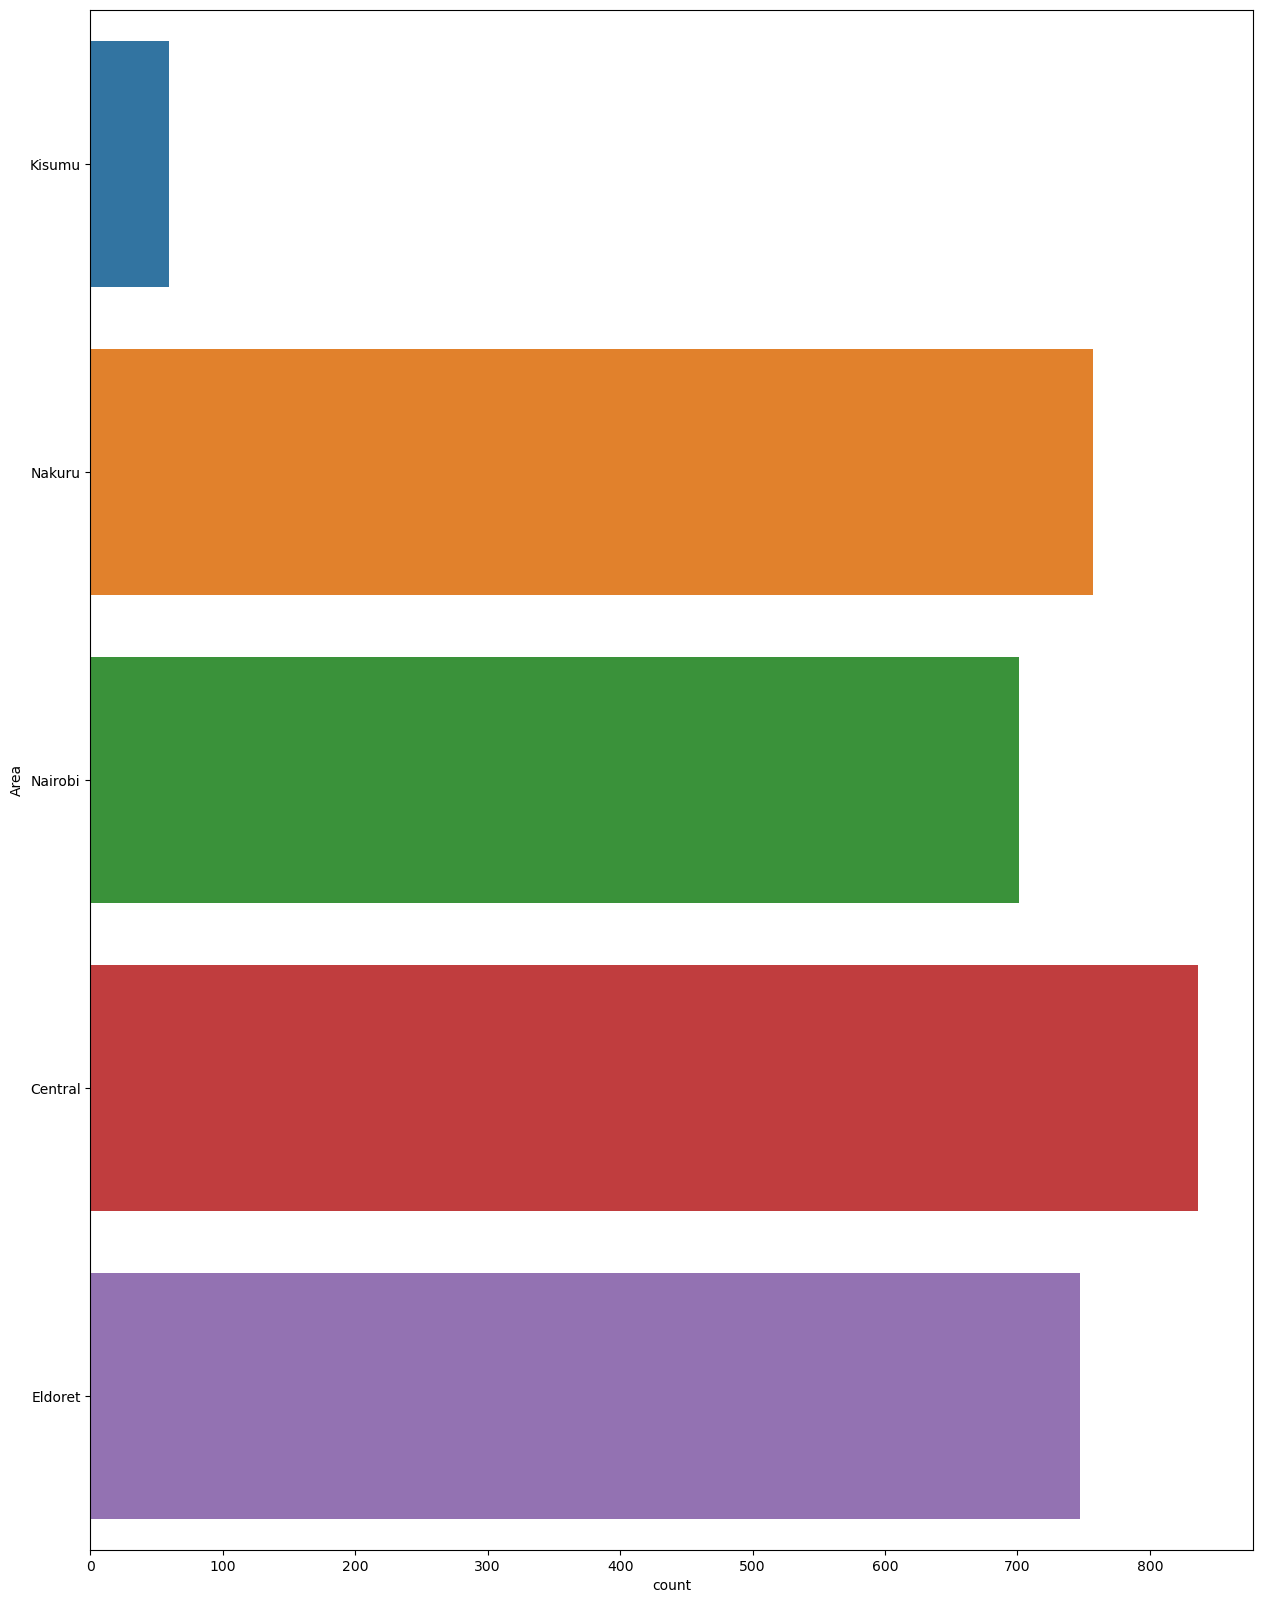

In [15]:
#Plotting a bar plot graph to show all the regions with their total yeilds
plt.figure(figsize=(15,20))
sns.countplot(y=df['Area'])
plt.show()

In [16]:
(df['Area'].value_counts() < 500).sum()

1

In [17]:
#Calculating the total yield (harvested yield per hectare) per region by iterating over unique values in the 'Area' column of the DataFrame
region = df['Area'].unique()
yield_per_region = []
for state in region:
    yield_per_region.append(df[df['Area']==state]['hg/ha_yield'].sum())

In [18]:
df['hg/ha_yield'].sum()

252681122

In [100]:
#Calculating the total yields per region
yield_per_region

[3403482, 62016257, 53319719, 70217441, 63724223]

<Axes: >

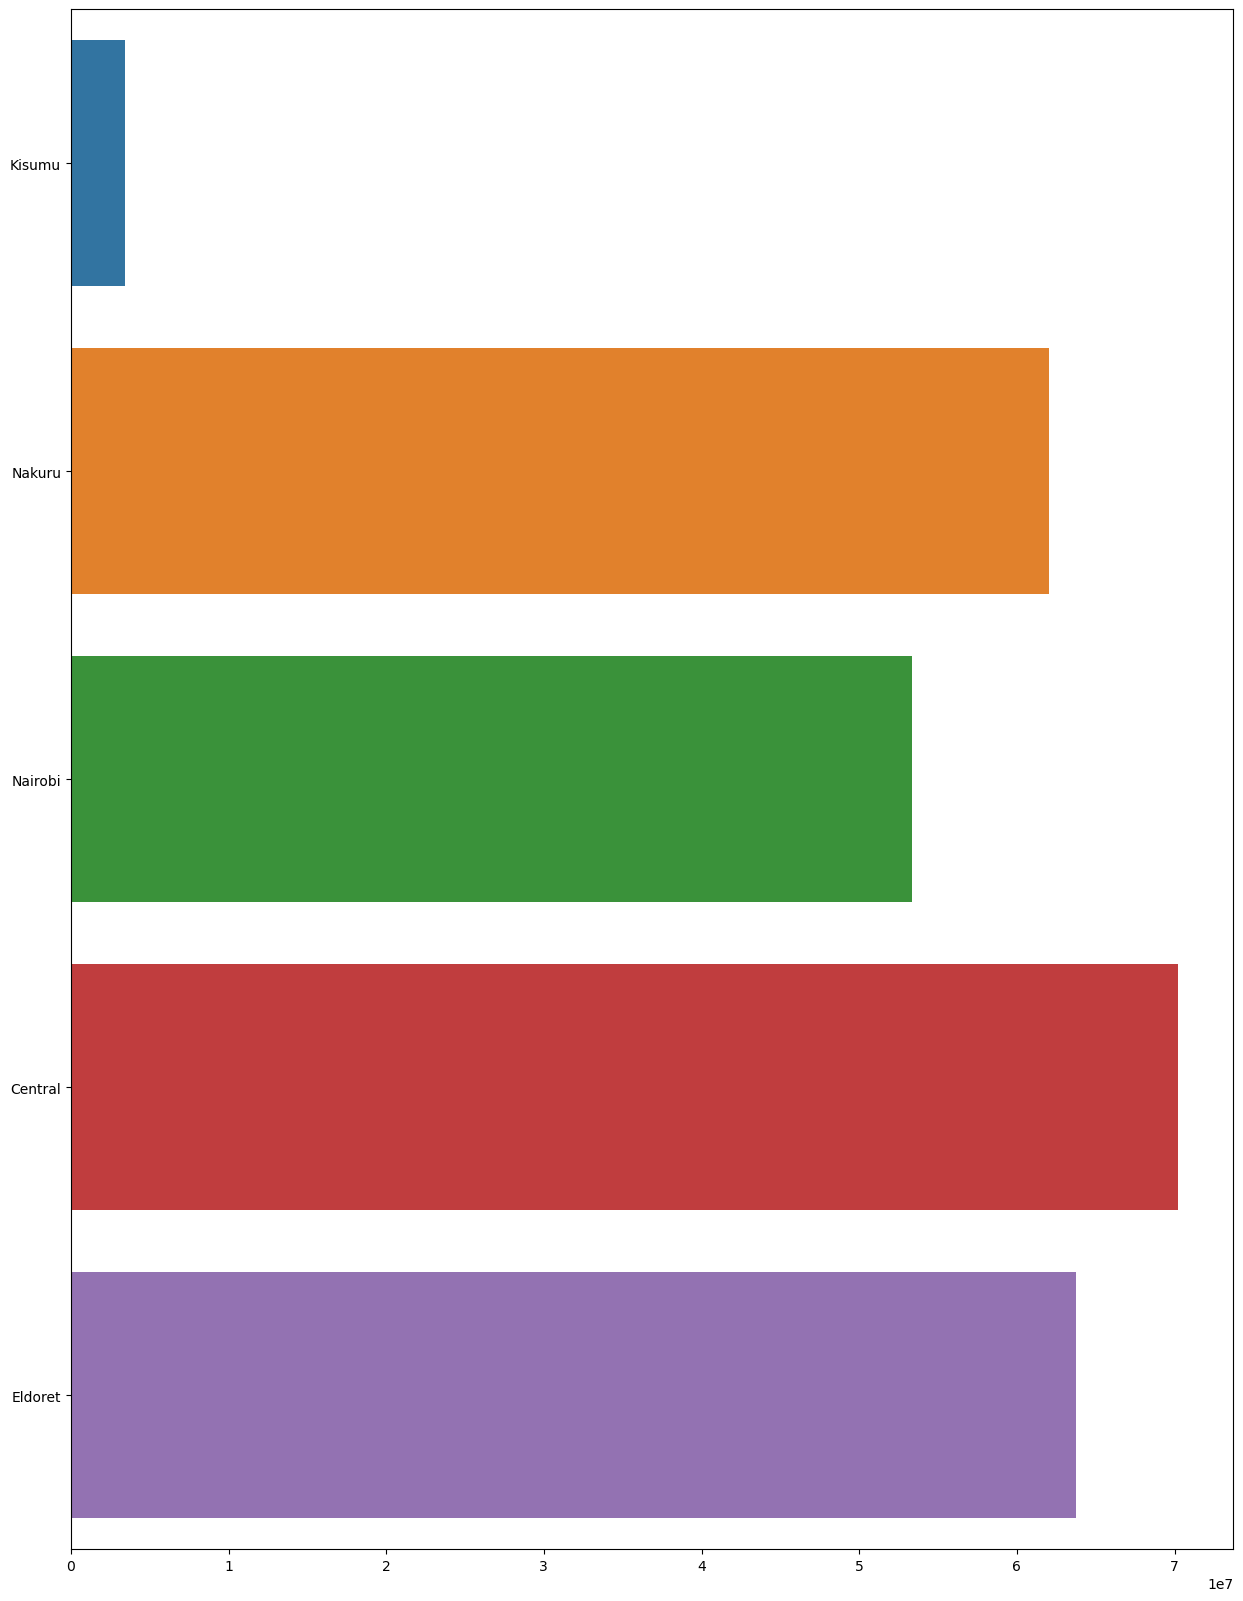

In [101]:
#Plotting a bar plot to display the regions with their total sum of yields
plt.figure(figsize=(15, 20))
sns.barplot(y=region, x=yield_per_region)

In [103]:
crops = df['Item'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item']==crop]['hg/ha_yield'].sum())

<Axes: >

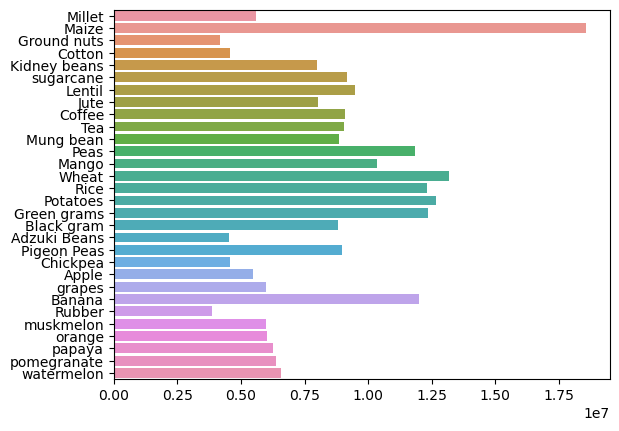

In [104]:
#Ploting a bar graph to display frequency vs item(crops being grown)
sns.barplot(y=crops,x=yield_per_crop)

# Distribution of the Target Variable

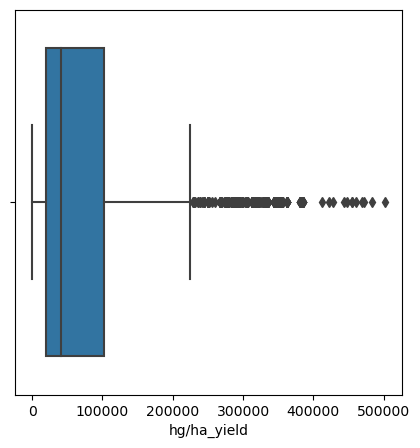

In [30]:
plt.figure(figsize=(5,5))
sns.boxplot(x='hg/ha_yield', data=df)
plt.show()

In [29]:
#Seperating the independent variables(X) and the dependent variables (y)
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[col]
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [106]:
#Training the dataset setting 80% of the data as the training set and 20% as the testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

# Converting Categorical to Numerical and Scaling the values

In [107]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [0, 1, 2, 3]),
            ('OHE', ohe, [4, 5]),
        ],
        remainder='passthrough'
)

In [108]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

In [109]:
preprocesser.get_feature_names_out(col[:-1])

array(['StandardScale__Year',
       'StandardScale__average_rain_fall_mm_per_year',
       'StandardScale__pesticides_tonnes', 'StandardScale__avg_temp',
       'OHE__Area_Eldoret', 'OHE__Area_Kisumu', 'OHE__Area_Nairobi',
       'OHE__Area_Nakuru', 'OHE__Item_Apple', 'OHE__Item_Banana',
       'OHE__Item_Black gram', 'OHE__Item_Chickpea', 'OHE__Item_Coffee',
       'OHE__Item_Cotton', 'OHE__Item_Green grams',
       'OHE__Item_Ground nuts', 'OHE__Item_Jute',
       'OHE__Item_Kidney beans', 'OHE__Item_Lentil', 'OHE__Item_Maize',
       'OHE__Item_Mango', 'OHE__Item_Millet', 'OHE__Item_Mung bean',
       'OHE__Item_Peas', 'OHE__Item_Pigeon Peas', 'OHE__Item_Potatoes',
       'OHE__Item_Rice', 'OHE__Item_Rubber', 'OHE__Item_Tea',
       'OHE__Item_Wheat', 'OHE__Item_grapes', 'OHE__Item_muskmelon',
       'OHE__Item_orange', 'OHE__Item_papaya', 'OHE__Item_pomegranate',
       'OHE__Item_sugarcane', 'OHE__Item_watermelon'], dtype=object)

# Training the Model

In [110]:
#linear regression
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score

#Define the regression model
models = {
    'lr':LinearRegression(),
    'lss':Lasso(),
    'Rid':Ridge(),
    'Dtr':DecisionTreeRegressor()
}
for name, md in models.items():
    md.fit(X_train_dummy,y_train)
    y_pred = md.predict(X_test_dummy)
    
    print(f"{name} : mae : {mean_absolute_error(y_test,y_pred)} score : {r2_score(y_test,y_pred)}")

lr : mae : 65984.42806516011 score : 0.060116489592065614
lss : mae : 65983.02428272195 score : 0.060215597815040045
Rid : mae : 65967.34185278193 score : 0.06105053572624708
Dtr : mae : 77007.31451612903 score : -0.865712677655915


In [111]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)

array([ 17899.,  14295., 100000.,   2016.,  54329., 166667.,  45237.,
       186040.,  42989., 344391., 294270.,   2500., 298183.,  34003.,
        65604., 328633., 141084.,  23333.,  90000.,  14825.,  44688.,
        30558.,  21673., 286765.,  47619.,  18209., 113070.,  30556.,
        24376., 382592.,  21241.,  20148.,  35428.,  40252.,  90907.,
        18390.,   4449.,  20301.,  67187., 277566.,  16667.,  24733.,
        36845.,  10788., 130631.,  80475., 132173., 100000., 140264.,
        20993.,  23629.,  25302.,  13738., 155252., 210000.,  12222.,
       100000.,  17899., 101000.,  20100., 132702., 422676.,  44029.,
         6690.,  40252.,  63503., 130000.,  20032.,  28691., 284527.,
        31254.,   9000.,  63540., 100000., 120019.,  64441.,  16810.,
        88003.,  17899., 454642., 307044., 151142.,  46620.,  56912.,
        50653., 125529.,  57390.,  84609., 385434.,  19153.,  53856.,
       113070.,  15541., 141667.,  45531.,  20352.,  25661.,  44206.,
       155252.,  913

# Creating the Front end which is the Predictive System

In [112]:
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create an array of the input features
    features = np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]], dtype=object)

    # Transform the features using the preprocessor
    transformed_features = preprocesser.transform(features)

    # Make the prediction
    predicted_yield = dtr.predict(transformed_features).reshape(1, -1)

    return predicted_yield[0]

Year = 2018
average_rain_fall_mm_per_year =202.9355362
pesticides_tonnes = 121.00
avg_temp = 20.87974371                 
Area = 'Kisumu'
Item = 'Millet'
result = prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)

X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but OneHotEncoder was fitted with feature names


In [113]:
result

array([36613.])

# Pickle files

In [116]:
import pickle
pickle.dump(dtr,open('dtr.pkl','wb'))
pickle.dump(preprocesser,open('preprocessor.pkl','wb'))

In [115]:
import sklearn
print(sklearn.__version__)

1.3.0
